Putting all together what we have learned to far. Theirfor we use more complex data from [Kaggle](www.kaggle.com).

Kaggle is a website to find datasets, learn more about nn and stuff and compete in competitions!

For this example we are using this [dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

on [github](https://github.com/stedy/Machine-Learning-with-R-datasets)



In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('absl').setLevel(logging.ERROR)

In [3]:
# run wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv
insurance_dataset_original = pd.read_csv('insurance.csv')

In [4]:
insurance_dataset_original

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


First step is to normalize the dataset

1) age is of type
2) sex is of type
3) bmi is of type
4) children is of type
5) smoker is of type
6) region is of type
7) charges is of type

In [5]:
insurance_dataset = insurance_dataset_original.copy(deep=True)

In [6]:
# make data more easy
def round_3(n):
    if n in [0,1,2]:
        return -n
    elif n in [3,4,5,6,7]:
        return -n+5
    elif n in [8,9]:
        return -n+10

def round_4(n):
    if n in [0,1]:
        return -n
    elif n in [2,3,4]:
        return -n+3
    elif n in [5,6,7]:
        return -n+6
    elif n in [8,9]:
        return -n+10

def round_children(n):
    if n == 0:
        return 'none'
    elif n in [1,2]:
        return 'some'
    elif n > 2:
        return 'many'


In [7]:
age_dataset = insurance_dataset['age']
insurance_dataset['age'] = age_dataset.apply(lambda x: x+round_3(x%10))

bmi_dataset = insurance_dataset['bmi']
insurance_dataset['bmi'] = bmi_dataset.apply(lambda x: round(x)+round_4(round(x)%10))

children_dataset = insurance_dataset['children'].infer_objects()
insurance_dataset['children'] = children_dataset.apply(lambda x: round_children(x))

charges_dataset = pd.to_numeric(insurance_dataset['charges'])
insurance_dataset['charges'] = charges_dataset.apply(lambda x: int(x/1000))

insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,20,female,30,none,yes,southwest,16
1,20,male,33,some,no,southeast,1
2,30,male,33,many,no,southeast,4
3,35,male,23,none,no,northwest,21
4,30,male,30,none,no,northwest,3
...,...,...,...,...,...,...,...
1333,50,male,30,many,no,northwest,10
1334,20,female,33,none,no,northeast,2
1335,20,female,36,none,no,southeast,1
1336,20,female,26,none,no,southwest,2


In [8]:
insurance_dataset_one_hot = pd.get_dummies(insurance_dataset)
insurance_dataset_one_hot

,age,bmi,charges,sex_female,sex_male,children_many,children_none,children_some,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,20,30,16,True,False,False,True,False,False,True,False,False,False,True
1,20,33,1,False,True,False,False,True,True,False,False,False,True,False
2,30,33,4,False,True,True,False,False,True,False,False,False,True,False
3,35,23,21,False,True,False,True,False,True,False,False,True,False,False
4,30,30,3,False,True,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,10,False,True,True,False,False,True,False,False,True,False,False
1334,20,33,2,True,False,False,True,False,True,False,True,False,False,False
1335,20,36,1,True,False,False,True,False,True,False,False,False,True,False
1336,20,26,2,True,False,False,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

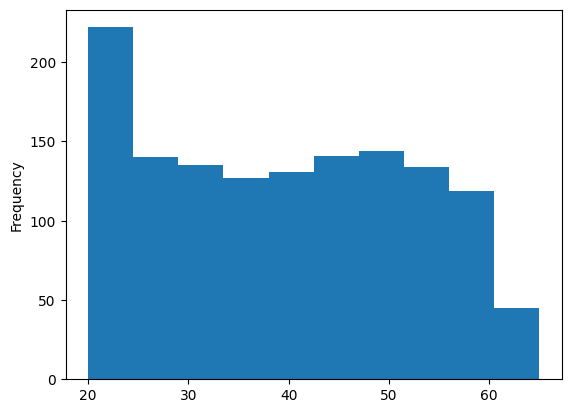

In [27]:
# normalize here
insurance_dataset_one_hot['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

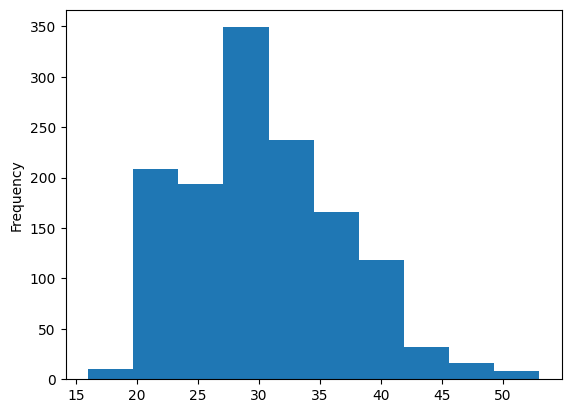

In [28]:
insurance_dataset_one_hot['bmi'].plot(kind='hist')

In [10]:
y_insurance_dataset_one_hot = insurance_dataset_one_hot['charges']
x_insurance_dataset_one_hot = insurance_dataset_one_hot.drop(columns=['charges'])

In [11]:
# create test and training data 30 / 70
perc = int(len(insurance_dataset_one_hot.age) * (7/10))
x_insurance_dataset_one_hot_train = x_insurance_dataset_one_hot[0:perc]
y_insurance_dataset_one_hot_train = y_insurance_dataset_one_hot[0:perc]

x_insurance_dataset_one_hot_test = x_insurance_dataset_one_hot[perc:]
y_insurance_dataset_one_hot_test = y_insurance_dataset_one_hot[perc:]

In [12]:
# doing the splitting and converting with sklearn
from sklearn.model_selection import train_test_split

y_insurance_dataset_one_hot = insurance_dataset_one_hot['charges']
x_insurance_dataset_one_hot = insurance_dataset_one_hot.drop(columns=['charges'])
x_train, x_test, y_train, y_test = train_test_split(x_insurance_dataset_one_hot, y_insurance_dataset_one_hot, train_size=0.2, random_state=42)

In [13]:
x_train.shape, y_train.shape

((267, 13), (267,))

In [14]:
x_train.shape

(267, 13)

In [15]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_train

<tf.Tensor: shape=(267, 13), dtype=float32, numpy=
array([[55., 33.,  1., ...,  0.,  1.,  0.],
       [25., 30.,  0., ...,  0.,  0.,  0.],
       [20., 26.,  0., ...,  0.,  0.,  0.],
       ...,
       [60., 26.,  0., ...,  0.,  0.,  0.],
       [35., 50.,  1., ...,  0.,  0.,  1.],
       [55., 30.,  0., ...,  0.,  0.,  1.]], dtype=float32)>

In [16]:
y_train = tf.convert_to_tensor(y_train)
y_train

<tf.Tensor: shape=(267,), dtype=int64, numpy=
array([10, 35, 15, 10,  1,  3, 26, 16, 26, 40, 28,  3, 11,  4, 11, 14,  5,
       46,  9,  2,  3, 21,  2, 11, 11,  5, 20, 12,  7, 34,  4,  7, 21, 41,
        2,  3,  6,  7,  6,  6, 11, 14, 30,  3, 13, 37,  7, 10, 20, 62,  6,
        5,  1,  1,  4, 19, 11,  3, 26, 34,  6,  1, 24,  5,  1,  6, 13,  6,
       13, 13, 48,  5, 40, 14, 20, 11, 14, 11,  3,  2,  4, 18,  1,  4,  8,
       46,  9,  2, 41,  9,  2, 13,  7, 12, 14,  4,  5,  8, 24, 25, 32,  1,
        4, 10,  4, 47, 16, 20, 37,  7,  1,  4, 10,  1,  5,  2, 11,  3,  2,
       14, 18, 10, 36,  8,  1, 58,  8,  9, 38,  4,  6,  4,  8,  3,  9,  3,
        8,  9, 43,  5,  7,  2, 11,  8,  7,  8, 16,  8, 11,  9, 13,  2,  2,
       40,  9, 22,  1,  4, 22, 13,  8,  6,  9,  2,  2, 14,  3,  3,  7, 16,
       47, 14,  2,  2, 18, 10,  8, 40, 25, 14, 39,  7,  5,  2, 27,  5,  3,
       10,  1,  8,  6, 13, 12,  1,  2, 21,  1,  9,  7,  8, 36,  6,  8,  9,
        1,  2, 35,  2, 20,  4, 51, 10,  3, 19, 10,  2,

In [17]:
model = ks.models.Sequential()
model.add(ks.layers.Dense(10, activation=tf.keras.activations.sigmoid))
model.add(ks.layers.Dense(9, activation=tf.keras.activations.sigmoid))
model.add(ks.layers.Dense(10, activation=tf.keras.activations.relu))
model.add(ks.layers.Dense(10, activation=tf.keras.activations.sigmoid))
model.add(ks.layers.Dense(1))

model.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 11.3013 - mae: 11.3013
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 10.3288 - mae: 10.3288
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 9.6108 - mae: 9.6108
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 9.1103 - mae: 9.1103
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 8.8530 - mae: 8.8530
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 8.7042 - mae: 8.7042
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 8.5927 - mae: 8.5927
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 8.5416 - mae: 8.5416
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 8.5051 - mae: 8.5051
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 8.4779 - mae: 8.4779
Epoch 11/100
9/9 [==============================] - 0s 6ms/step - loss: 8.

In [18]:
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test)
model.evaluate(x_test, y_test)

34/34 [==============================] - 0s 5ms/step - loss: 3.7419 - mae: 3.7419


[3.7418785095214844, 3.7418785095214844]

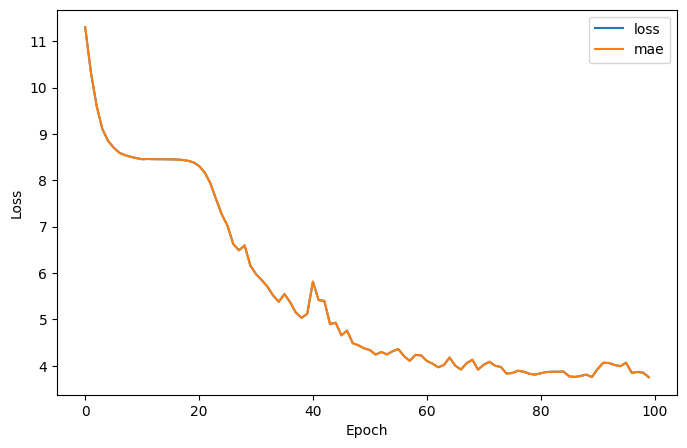

In [19]:
np.median(y_test.numpy()), np.mean(y_test.numpy())
model_history = model.history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Normalization of the data

array([[55., 33.,  1., ...,  0.,  1.,  0.],
       [25., 30.,  0., ...,  0.,  0.,  0.],
       [20., 26.,  0., ...,  0.,  0.,  0.],
       ...,
       [60., 26.,  0., ...,  0.,  0.,  0.],
       [35., 50.,  1., ...,  0.,  0.,  1.],
       [55., 30.,  0., ...,  0.,  0.,  1.]], dtype=float32)